In [2]:
import ROOT

Welcome to JupyROOT 6.28/04


In [3]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.05)
    text.SetTextFont(42)

In [17]:
f = ROOT.TFile("/home/choij/workspace/ChargedHiggsAnalysis/data/ClosFakeRate/2017/Skim3Mu__FakeStudy__/ClosFakeRate_SkimTree_SS2lOR3l_TTLL_powheg.root")
f.ls()

TFile**		/home/choij/workspace/ChargedHiggsAnalysis/data/ClosFakeRate/2017/Skim3Mu__FakeStudy__/ClosFakeRate_SkimTree_SS2lOR3l_TTLL_powheg.root	
 TFile*		/home/choij/workspace/ChargedHiggsAnalysis/data/ClosFakeRate/2017/Skim3Mu__FakeStudy__/ClosFakeRate_SkimTree_SS2lOR3l_TTLL_powheg.root	
  KEY: TDirectoryFile	SB3Mu;1	SB3Mu/Central/METv
  KEY: TDirectoryFile	SR3Mu;1	SR3Mu/Central/METv


In [21]:
h_obs = f.Get("SR3Mu/Central/ZCand2/mass"); h_obs.Rebin(5)
h_exp = f.Get("SB3Mu/Central/ZCand2/mass"); h_exp.Rebin(5)
for bin in range(h_exp.GetNbinsX()):
    h_exp.SetBinError(bin, h_exp.GetBinContent(bin)*0.3)
h_err = h_exp.Clone("error")

h_obs.SetMarkerStyle(8)
h_obs.SetMarkerSize(2)
h_obs.SetMarkerColor(ROOT.kBlack)
h_exp.SetStats(0)
h_exp.SetLineColor(ROOT.kBlack)
h_exp.SetLineWidth(2)
h_err.SetStats(0)
h_err.SetFillColorAlpha(12, 0.9)
h_err.SetFillStyle(3144)
h_err.GetXaxis().SetTitle("M(#mu^{+}#mu^{-})")
h_err.GetYaxis().SetTitle("Events / 5 GeV")

In [22]:
canvas = ROOT.TCanvas("c", "", 1600, 1600)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

legend.AddEntry(h_obs, "observed", "plf")
legend.AddEntry(h_exp, "expected", "plf")
legend.AddEntry(h_err, "error, 30%", "f")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


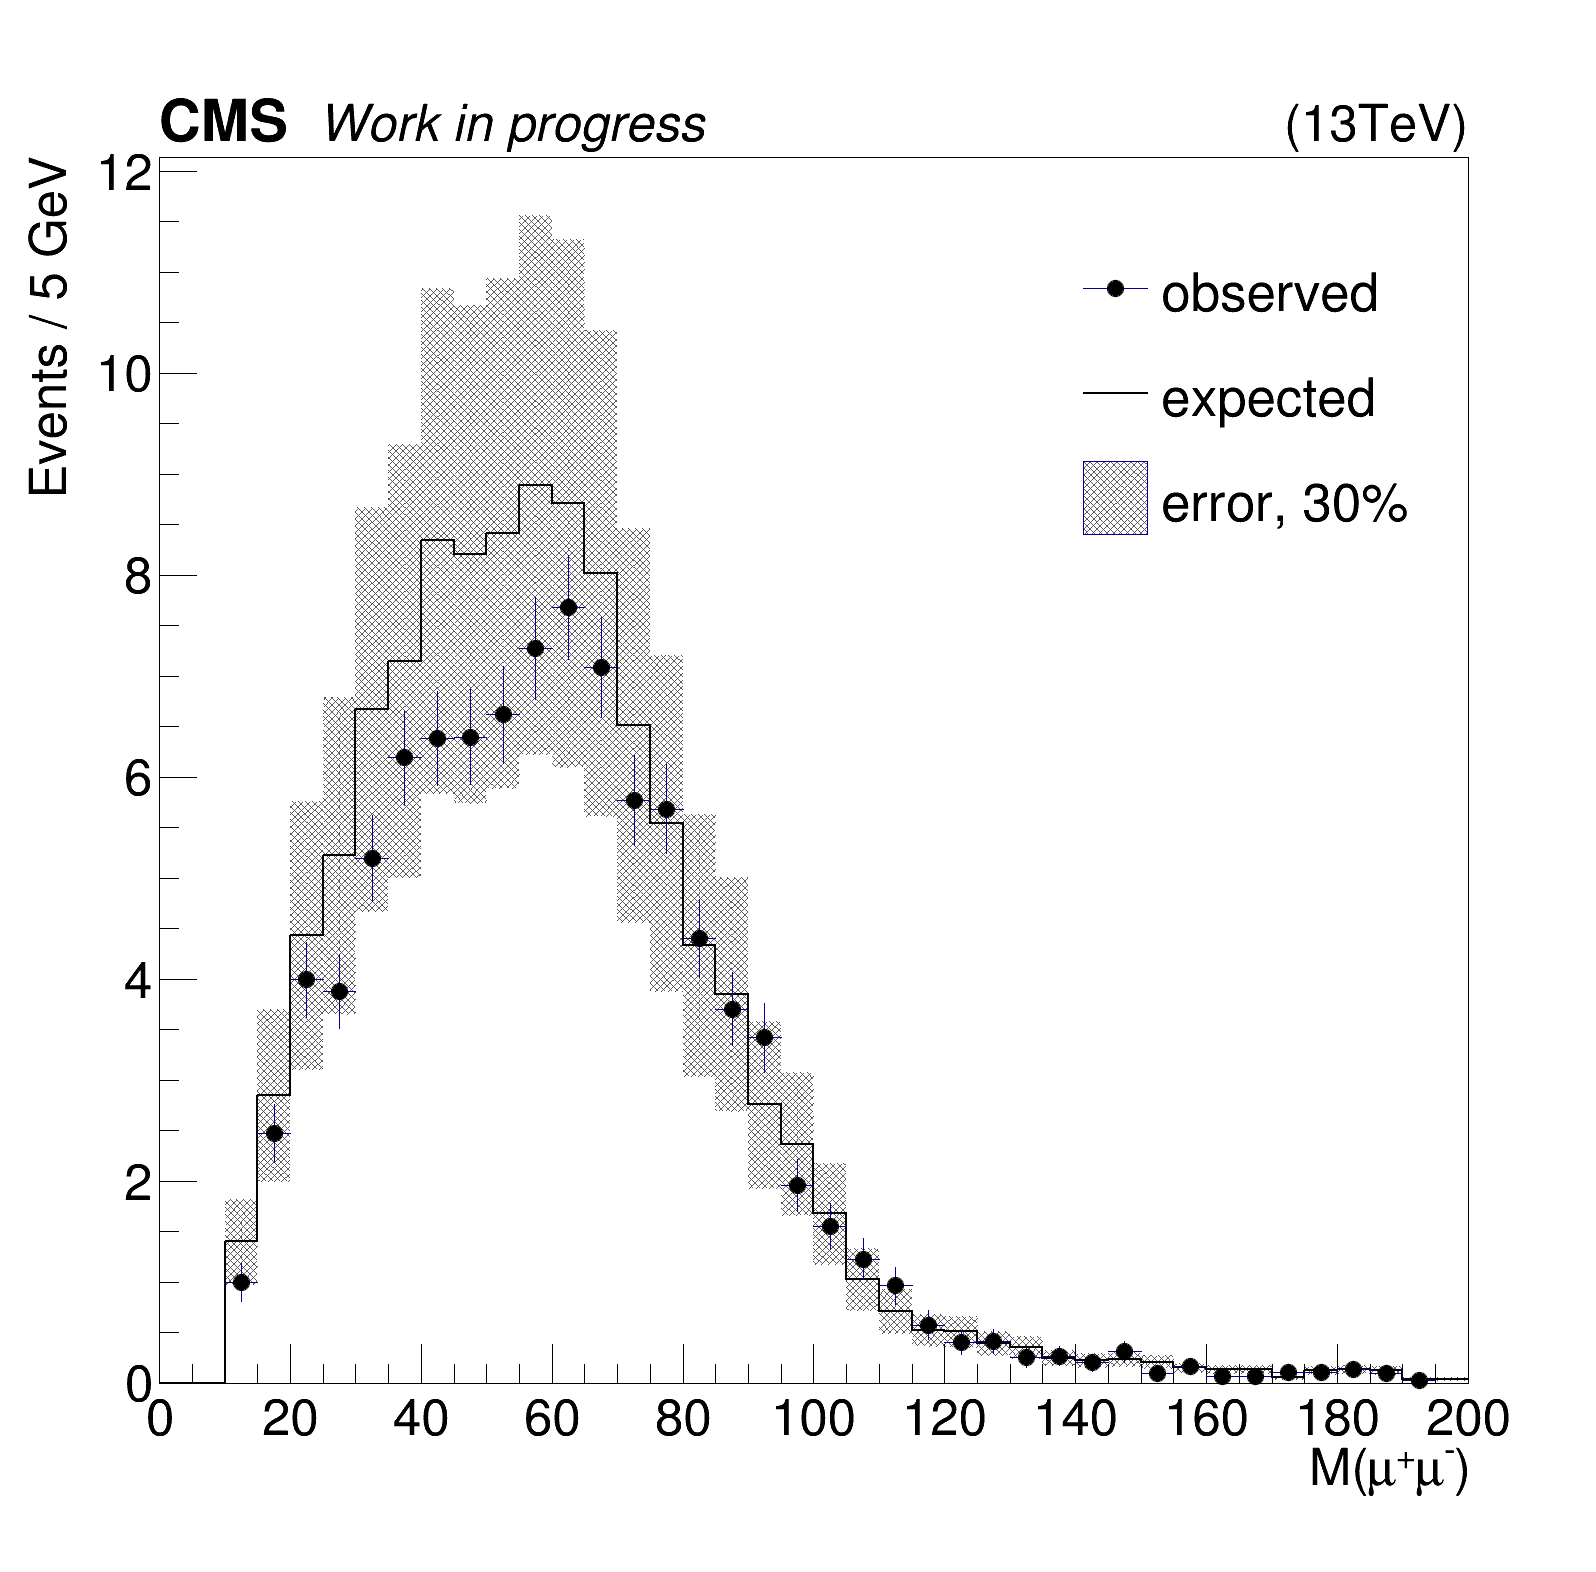

In [23]:
canvas.cd()
h_err.Draw("e2&f")
h_exp.Draw("hist&same")
h_obs.Draw("p&same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.805, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.2, 0.91, "Work in progress")

canvas.Draw()